In [24]:
#1
import pandas as pd

df = None

#a)
cities = pd.Series(data = ["Malmö", "Stockholm", "Uppsala", "Göteborg"])
population = pd.Series(data = (347949, 975551, 233839, 583056))

df = pd.DataFrame({"Kommun": cities, "Population": population})

print(df, end = "\n\n")

#b)
gbg = df[df["Kommun"] == "Göteborg"]
print(gbg, end = "\n\n")

#c)
sorted_by_population = df.sort_values(by = "Population", ascending = False)
print(sorted_by_population,  end = "\n\n")



      Kommun  Population
0      Malmö      347949
1  Stockholm      975551
2    Uppsala      233839
3   Göteborg      583056

     Kommun  Population
3  Göteborg      583056

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949
2    Uppsala      233839



In [20]:
#d)

df.sort_values(by = "Population", ascending = False).iloc[0:3]

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [26]:
#e)

df["% av Sveriges population"] = df.apply(lambda row: row["Population"] / 10379295 * 100, axis = 1)

df

,Kommun,Population,% av Sveriges population
0,Malmö,347949,3.352338
1,Stockholm,975551,9.399010
2,Uppsala,233839,2.252937
3,Göteborg,583056,5.617491


In [37]:
df = pd.DataFrame({
    "Kommun": ["Malmö", "Stockholm", "Uppsala", "Göteborg"], 
    "Population": [347949, 975551, 233839, 583056]
})

print(df["Kommun"], end = "\n\n")

print(df[df["Kommun"] == "Göteborg"], end = "\n\n")

df = df.sort_values(by = "Population", ascending = False)

print(df, end = "\n\n")

print(df.iloc[0:3])

df["% av befolkningen"] = df.apply(lambda row: row["Population"] / 10379295 * 100, axis = 1)

df

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

     Kommun  Population
3  Göteborg      583056

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949
2    Uppsala      233839

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949


,Kommun,Population,% av befolkningen
1,Stockholm,975551,9.399010
3,Göteborg,583056,5.617491
0,Malmö,347949,3.352338
2,Uppsala,233839,2.252937


In [69]:
df = pd.read_excel("komtopp50_2020.xlsx")

df = df.iloc[6:]

df = df.rename({
    "Unnamed: 0": "Rang 2020", 
    "Unnamed: 1": "Rang 2019", 
    "Unnamed: 2": "Kommun", 
    "Unnamed: 3": "Folkmängd 2020", 
    "Unnamed: 4": "Folkmängd 2019", 
    "Unnamed: 5": "Förändring"
}, axis = "columns")

df = df.reset_index()

df = df.sort_values(by = "Folkmängd 2020", ascending = False)

df.iloc[-5:]

,index,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
45,51,46,47.0,Sundbyberg,52801,52414.0,387
46,52,47,46.0,Borlänge,52394,52590.0,-196
47,53,48,48.0,Hässleholm,52010,52145.0,-135
48,54,49,49.0,Sigtuna,49537,48964.0,573
49,55,50,50.0,Tyresö,48678,48333.0,345


In [67]:
df["Folkmängd 2020"].sum()


6227447

<AxesSubplot:xlabel='Kommun', ylabel='Folkmängd 2020'>

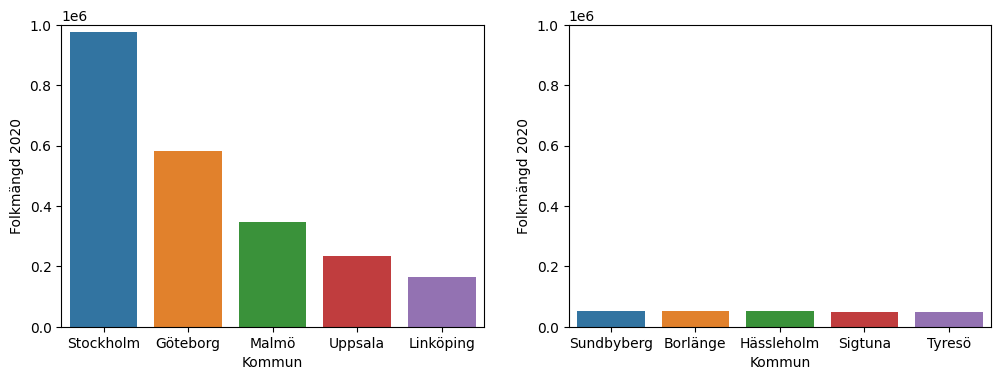

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, dpi = 100, figsize = (12, 4))

ax[0].set_ylim([0, 1000000])
ax[1].set_ylim([0, 1000000])

sns.barplot(data = df.head(), x = "Kommun", y = "Folkmängd 2020", ax = ax[0])
sns.barplot(data = df.tail(), x = "Kommun", y = "Folkmängd 2020", ax = ax[1])